<h3>USFWS-Pea Island Beach Monitoring - Plot Group 7 - Beach Penetration Testing/Compaction Results</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline

In [3]:
### import the transect data, yep all of it for now, to a pandas df:

fpath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/'
fn='TransectData_updated.csv'  ###'FWStransect_data_etc.csv'

hdr=["sheet_code","sample_date","transect_id","PIs","low_tide","high_tide","slope",
     "uprush_distance","swc_at_1in","swc_at_6in","swc_at_12in","mbc_at_1in","mbc_at_6in",
     "mbc_at_12in","scarp_ht","sandbar_distance","air_temp","water_temp","wave_ht",
     "salinity","comments","sample_time"]

df = pd.read_csv(fpath+fn, names=hdr)

# convert the data sets 8601 dates to a Python date time string and load to new field 'survey' in the
# dataframe df:
datetime2survey = lambda i: datetime.datetime.strptime(i,"%Y-%m-%d %H:%M:%S").strftime('%Y%m')
df['survey'] = df['sample_date'].apply( datetime2survey )



In [4]:
## create and populate new group column (field) based on transect id type (e.g., control or transect):
df.loc[df['transect_id'].str[0] == 'C', 'group'] ='control'
df.loc[df['transect_id'].str[0] =='T', 'group'] = 'treatment'

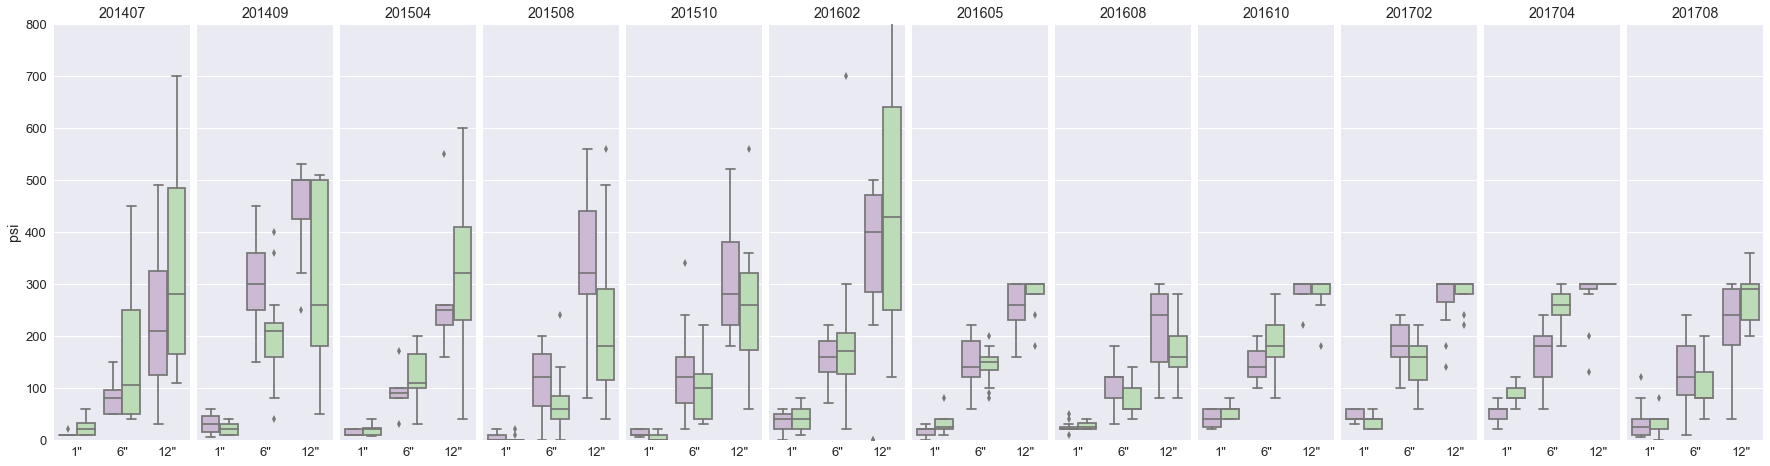

In [5]:
### Boxplots, for the swash zone tests:

df2=pd.melt(df, id_vars=['survey', 'group'], value_vars=['swc_at_1in','swc_at_6in','swc_at_12in'],
           var_name='swc' ,value_name='psi')

sns.set()
sns.set_context('talk')
sns.set(style="ticks")
sns.set(font_scale=1.3)

#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'grid.color': 'white', 
#            'xtick.major.size':'7'})
#, 'ytick.major.size':'16'

gsw = sns.FacetGrid(df2, col="survey",size=7, aspect=0.3)
gsw=(gsw.map(sns.boxplot, "swc", "psi", "group", palette='PRGn')
    .set(ylim=(0,800))
    .set(xticklabels=['1\"','6\"','12\"'])
    .set_titles("{col_name}")
    .set(xlabel="")
    .fig.subplots_adjust(wspace=0.05,hspace=0.05))

plot_path='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/plotGroup7/'
plt.savefig(plot_path+'PenetrationT_swash_boxp.jpg', dpi=300)

In [6]:
df.sample_date.unique()
#df['ghost_crabs'].where((df['survey'] == '201407') & ( df['group'] == 'treatment')).sum()



array(['2015-04-28 0:00:00', '2017-04-27 0:00:00', '2015-08-04 0:00:00',
       '2016-08-09 0:00:00', '2017-08-04 0:00:00', '2016-02-17 0:00:00',
       '2017-02-19 0:00:00', '2014-07-14 0:00:00', '2016-05-10 0:00:00',
       '2015-10-20 0:00:00', '2016-10-13 0:00:00', '2014-09-29 0:00:00'], dtype=object)

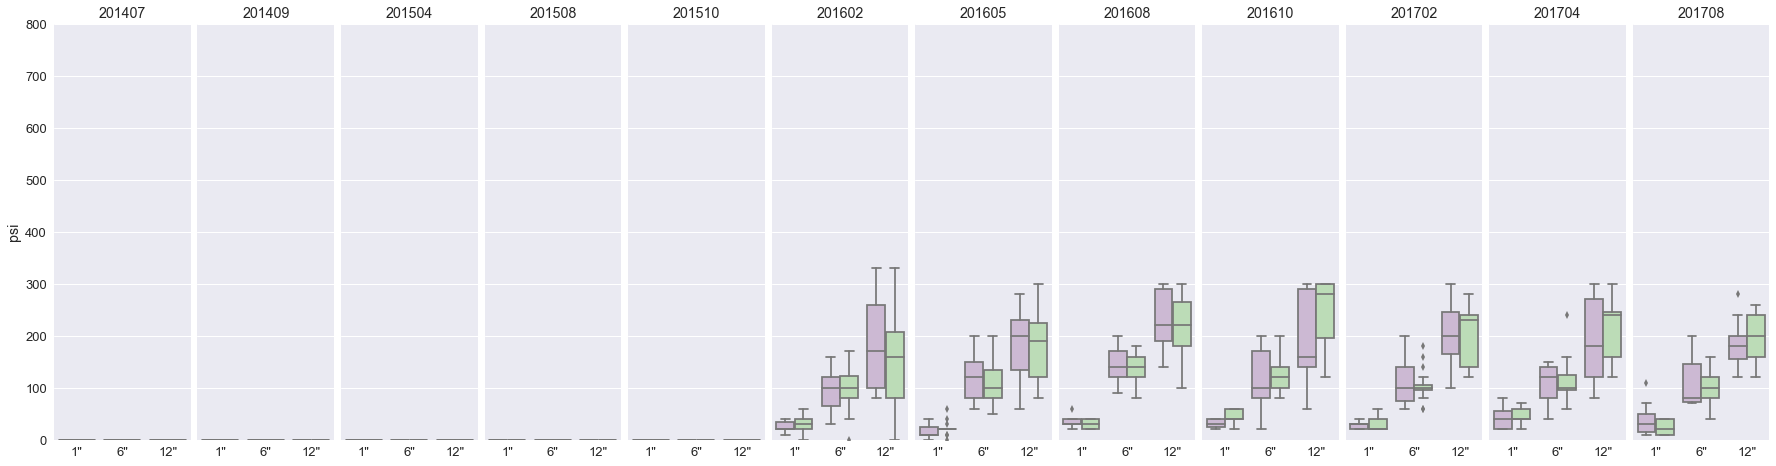

In [7]:
### Boxplots, for the mid-beach zone tests:

df3=pd.melt(df, id_vars=['survey', 'group'], value_vars=['mbc_at_1in','mbc_at_6in','mbc_at_12in'],
           var_name='mbc' ,value_name='psi').fillna(0)

sns.set()
sns.set(style='ticks')
sns.set(font_scale=1.3)
sns.plotting_context('talk')

gmb = sns.FacetGrid(df3, col="survey",size=7, aspect=0.3)
(gmb.map(sns.boxplot, "mbc", "psi", "group", palette='PRGn')
    .set(ylim=(0,800))
    .set(xticklabels=['1\"','6\"','12\"'])
    .set_titles("{col_name}")
    .set(xlabel="")
    .fig.subplots_adjust(wspace=0.05,hspace=0.05))


plot_path='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/plotGroup7/'
plt.savefig(plot_path+'PenetrationT_midbeach_boxp.jpg', dpi=300)

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 4 columns):
survey    951 non-null object
group     951 non-null object
mbc       951 non-null object
psi       951 non-null float64
dtypes: float64(1), object(3)
memory usage: 29.8+ KB


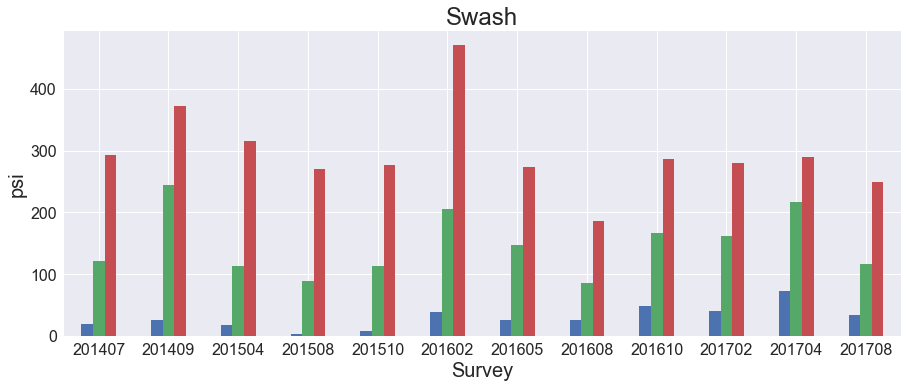

In [11]:
#fig1 = plt.figure(figsize=(15,8))
#ax1 = fig1.add_subplot(1,1,1)

df1=df.groupby(['survey'])[['swc_at_1in','swc_at_6in','swc_at_12in']].mean()

# figsize=(15,5),  pad=21.1, w_pad=0.5, h_pad=2.0
df1[['swc_at_1in','swc_at_6in','swc_at_12in']].plot(kind='bar', figsize=(15,8), 
                                             rot=0,legend=False, fontsize=16)

plt.xlabel('Survey', fontsize=20)
plt.ylabel('psi', fontsize=20)
plt.title('Swash', fontsize=24)
plt.subplots_adjust(bottom=0.35)

plot_path='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/plotGroup7/'
plt.savefig(plot_path+'PenetrationT_swash.jpg', dpi=300)

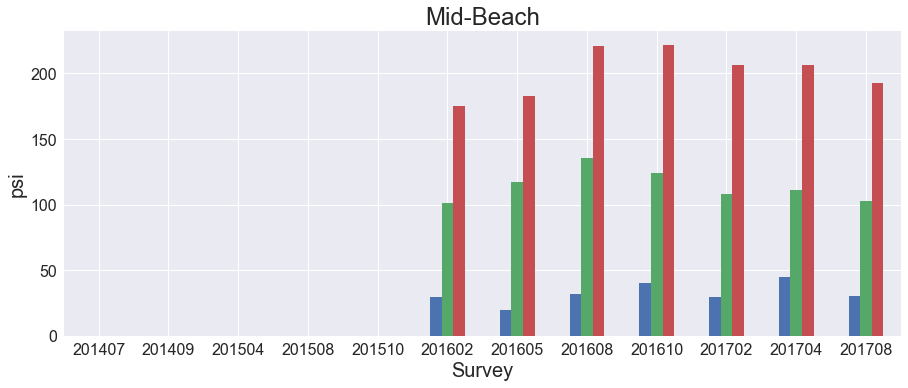

In [12]:
#fig2 = plt.figure(figsize=(15,8))
#ax2 = fig2.add_subplot(1,1,1)

df1=df.groupby(['survey'])[['mbc_at_1in','mbc_at_6in','mbc_at_12in']].mean()
df1[['mbc_at_1in','mbc_at_6in','mbc_at_12in']].plot(kind='bar', figsize=(15,8), 
                                               rot=0,legend=False, fontsize=16)

plt.xlabel('Survey', fontsize=20)
plt.ylabel('psi', fontsize=20)
plt.title('Mid-Beach', fontsize=24)
plt.subplots_adjust(bottom=0.35)

plot_path='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/plotGroup7/'
plt.savefig(plot_path+'PenetrationT_midbeach.jpg', dpi=300)